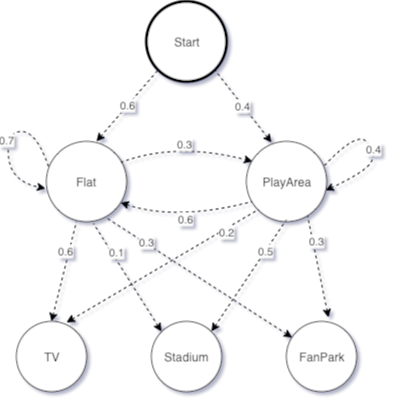

In [1]:
from pomegranate import *
import random
import math
from IPython.display import Image

random.seed(0)
Image('hmm_ipl.png')

In [2]:
model = HiddenMarkovModel( name="IPL" )

In [3]:
Flat = State( DiscreteDistribution({ 'TV': 0.6, 'Stadium': 0.1, 'FanPark': 0.3 }), name='Flat' )
PlayArea = State( DiscreteDistribution({ 'TV': 0.2, 'Stadium': 0.5, 'FanPark': 0.3 }), name='PlayArea' )

In [4]:
model.add_transition( model.start, Flat, 0.6 )
model.add_transition( model.start, PlayArea, 0.4 )

In [5]:
model.add_transition( Flat, Flat, 0.65 )
model.add_transition( Flat, PlayArea, 0.25 )
model.add_transition( PlayArea, Flat, 0.55 )
model.add_transition( PlayArea, PlayArea, 0.35 )

In [6]:
model.add_transition( Flat, model.end, 0.1 )
model.add_transition( PlayArea, model.end, 0.1 )

In [7]:
model.bake( verbose=True )

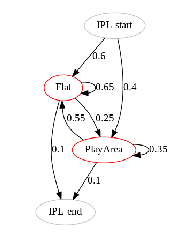

In [8]:
model.plot()

In [9]:
sequence = [ 'TV', 'TV', 'Stadium', 'FanPark', 'FanPark', 'TV' ]

In [10]:
print(math.e**model.forward( sequence )[ len(sequence), model.end_index ])

0.00011563538400000006


In [11]:
print(math.e**model.forward_backward( sequence )[1][ 3, model.states.index( PlayArea ) ])

0.35017624017229876


In [12]:
print(math.e**model.backward( sequence )[ 3, model.states.index( Flat ) ])

0.003117600000000001


In [13]:
print(" ".join( state.name for i, state in model.maximum_a_posteriori( sequence )[1] ))

Flat Flat PlayArea Flat Flat Flat
